<a href="https://colab.research.google.com/github/anshulj99/Black-AND-Gold/blob/main/Pore_Doublet_Trapping_model_of_Reservoir.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Program to check if the oil is trapped or mobilized using Pore Doublet Model**

Consider the oil displacement by water in a single pore of radius 10 micro meter at a velocity of 1 ft/D. The length of the pore is 0.02 in., the viscosity is 1 cp, and the IFT is 30 dynes/cm. The contact angle, θ, is zero.



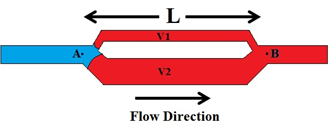

In [5]:
import math
import matplotlib.pyplot as plt

Taking radius of second pore throat = 20 micrometer

In [1]:
visc,length,vel1,rad1,rad2 = input("enter viscosity of the fluid, length of the pore, velocity of the fluid in pore1, radius of pore1 and pore2 in order: ").split(",")
visc,length,vel1,rad1,rad2 = [ float(visc), float(length), float(vel1), float(rad1), float(rad2)]

enter viscosity of the fluid, length of the pore, velocity of the fluid in pore1, radius of pore1 and pore2 in order: 1,0.02,1,10,20


In [2]:
IFT, cont_angle = input("enter the value of Interfacial Tension and the contact angle: ").split(",")
IFT, cont_angle = [ float(IFT), float(cont_angle)]

enter the value of Interfacial Tension and the contact angle: 30,0


Using Hagen-Poiseuille's equation:

Viscous pressure in Pore 1 [psi]  = (- 8 * viscosity * length_of_the_pore * velocity of liquid in pore 1) / (radius of pore 1) ^2

In [3]:
Pv1 = -8 * visc * length * vel1 / (rad1**2)
Pv1

-0.0016

Capillary Pressure = 2 * IFT * cos(theta)/ radius

In [6]:
Pc1 = 2 * IFT * math.cos(cont_angle)/ rad1
Pc1

6.0

Total Pressure across AB (fig) = Viscous Pressure + Capillary pressure

In [7]:
Pab = Pv1 + Pc1
Pab

5.9984

In [8]:
Pc2 = 2 * IFT * math.cos(cont_angle)/ rad2
Pc2

3.0

In [9]:
Pv2 = Pab - Pc2

In [10]:
vel2 = (- Pv2) * (rad2**2)/ (8 * visc * length)

In [11]:
print(f"The displacing velocity required in Pore 2 is {abs(vel2)} ft/D")

The displacing velocity required in Pore 2 is 7496.000000000001 ft/D


In [12]:
if vel2 > 0:
  print("Oil can be discplaced")
else:
  print("Oil is trapped")

Oil is trapped


In [14]:
radii2 = [10, 20, 40, 100, 1000]
velocity = []
for i in radii2:
  Pcx = 2 * IFT * math.cos(cont_angle)/ i
  Pvx = Pab - Pcx
  velocity.append(( Pvx) * (i**2)/ (8 * visc * length))

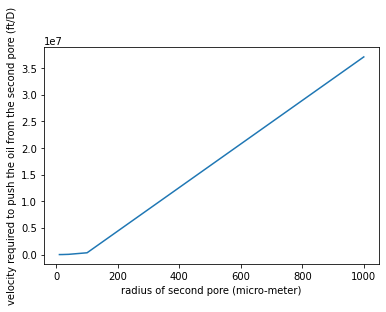

In [16]:
plt.plot(radii2,velocity)
plt.xlabel('radius of second pore (micro-meter)')
plt.ylabel('velocity required to push the oil from the second pore (ft/D)')
plt.show()  